In [1]:
# install if needed
# pip install pandas
# pip install statsmodels
# pip install matplotlib
# pip install -U scikit-learn

In [1]:
# imports 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

### Data Exploration


In [2]:
df = pd.read_csv('data_daily.csv')
print(df.shape)
print(df.describe())
df.head()

(365, 2)
       Receipt_Count
count   3.650000e+02
mean    8.826566e+06
std     7.820089e+05
min     7.095414e+06
25%     8.142874e+06
50%     8.799249e+06
75%     9.476970e+06
max     1.073886e+07


,# Date,Receipt_Count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289


#### Data Preprocessing
To predict monthly totals, I will:

    Aggregate the daily data to monthly totals
    Add columns for month and year
    Split into train/test sets

In [3]:
# Reading the data
df = pd.read_csv('data_daily.csv')  # Reading the given dataset

# Converting the '# Date' column to datetime
df['# Date'] = pd.to_datetime(df['# Date'])

# Extracting month and year from the date
df['Month'] = df['# Date'].dt.month
df['Year'] = df['# Date'].dt.year

# Grouping by month and year and summing the receipt count
df_grouped = df.groupby(['Year', 'Month']).sum().reset_index()

# Splitting the data into features and target
X = df_grouped[['Year', 'Month']]
y = df_grouped['Receipt_Count']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


### Model 1

We can use the sklearn library for this task. However, it's important to note that sklearn doesn't have built-in support for time series models like ARIMA. We can, however, use sklearn to implement a simple linear regression model for this problem.

Mean Squared Error: 33781488282662.406
R^2 Score: 0.849287278371998


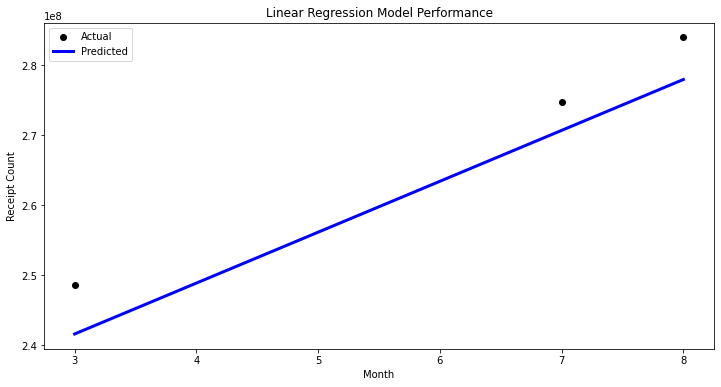

In [5]:
# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Visualizing the results
plt.figure(figsize=(12, 6))
plt.scatter(X_test['Month'], y_test, color='black', label='Actual')
plt.plot(X_test['Month'], y_pred, color='blue', linewidth=3, label='Predicted')
plt.xlabel('Month')
plt.ylabel('Receipt Count')
plt.title('Linear Regression Model Performance')
plt.legend()
plt.show()

### Performence of Model 1

In [6]:
# Making predictions for 2022
X_2022 = pd.DataFrame({'Year': [2022]*12, 'Month': range(1, 13)})
predictions_2022 = model.predict(X_2022)

# Printing the predictions for 2022
for month, prediction in zip(range(1, 13), predictions_2022):
    print(f"Month: {month}, Predicted Receipt Count: {prediction}")


Month: 1, Predicted Receipt Count: 227109945.67447916
Month: 2, Predicted Receipt Count: 234372283.69270834
Month: 3, Predicted Receipt Count: 241634621.7109375
Month: 4, Predicted Receipt Count: 248896959.72916666
Month: 5, Predicted Receipt Count: 256159297.74739584
Month: 6, Predicted Receipt Count: 263421635.765625
Month: 7, Predicted Receipt Count: 270683973.7838542
Month: 8, Predicted Receipt Count: 277946311.8020833
Month: 9, Predicted Receipt Count: 285208649.8203125
Month: 10, Predicted Receipt Count: 292470987.8385417
Month: 11, Predicted Receipt Count: 299733325.8567709
Month: 12, Predicted Receipt Count: 306995663.875


### Model 2

To approach this problem, we can use a simple time series forecasting technique such as the autoregressive integrated moving average (ARIMA) model. By theory and my own research I found ARIMA will performe better then the regular regression algoritoms.

Mean Squared Error: 4717141869528443.0


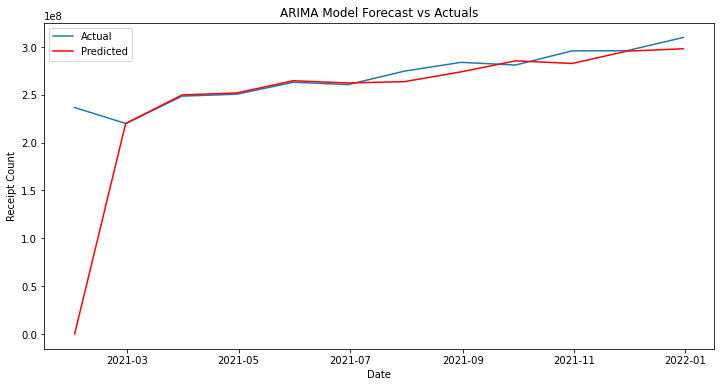

In [4]:
# Setting the index to the '# Date' column
df.set_index('# Date', inplace=True)
# Resampling the data on a monthly basis
df_monthly = df['Receipt_Count'].resample('M').sum()


# Fitting the ARIMA model
model = ARIMA(df_monthly, order=(5,1,0))  # You can change the order as needed
model_fit = model.fit()

# Forecasting for 12 months (2022)
forecast = model_fit.forecast(steps=12)

# Evaluating the model performance
residuals = df_monthly - model_fit.fittedvalues
mse = (residuals ** 2).mean()

print(f"Mean Squared Error: {mse}")

# Visualizing the results
plt.figure(figsize=(12, 6))
plt.plot(df_monthly, label='Actual')
plt.plot(model_fit.fittedvalues, color='red', label='Predicted')
plt.title('ARIMA Model Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Receipt Count')
plt.legend()
plt.show()

### Performence of Model 2

In [5]:
# Forecasting for 12 months (2022)
forecast = model_fit.forecast(steps=12)

# Printing the forecast for 2022 with respective months
for month, prediction in zip(range(1, 13), forecast):
    print(f"Month: {month}, Predicted Receipt Count: {prediction}")

Month: 1, Predicted Receipt Count: 309387703.75461006
Month: 2, Predicted Receipt Count: 311780471.7377218
Month: 3, Predicted Receipt Count: 312011822.34989434
Month: 4, Predicted Receipt Count: 312926199.8780609
Month: 5, Predicted Receipt Count: 312925776.8128488
Month: 6, Predicted Receipt Count: 313157516.04482645
Month: 7, Predicted Receipt Count: 313180705.62704366
Month: 8, Predicted Receipt Count: 313250101.5796836
Month: 9, Predicted Receipt Count: 313254691.90875083
Month: 10, Predicted Receipt Count: 313274511.3800297
Month: 11, Predicted Receipt Count: 313276860.25182647
Month: 12, Predicted Receipt Count: 313282500.17062896


Shahariar Rabby

https://rabby.dev

In [6]:
import joblib
joblib.dump(model_fit, 'arima_model3.pkl')

['arima_model3.pkl']